# Labo 11
Détection de caractéristiques

In [2]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import data
from skimage.transform import resize
from scipy.signal import correlate2d

## Exercice 1 - Feature matching
Identifier un patch dans `img1` et l'associer à `img2` en utilisant la somme des différences carrées (SSD).

/tmp/ipykernel_62778/1921857365.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = io.imread('statue1.PNG')
/tmp/ipykernel_62778/1921857365.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = io.imread('statue2.PNG')


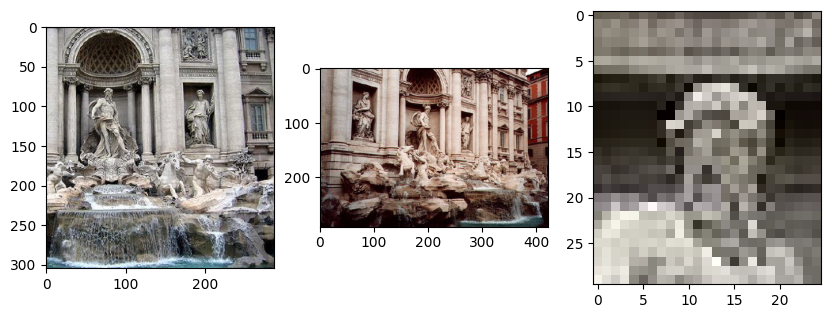

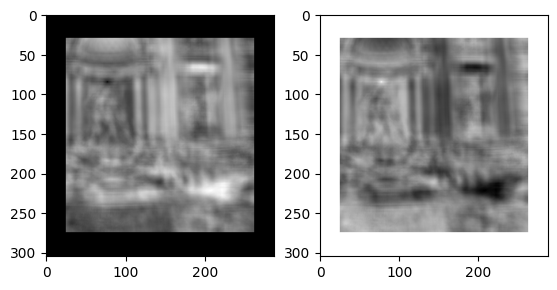

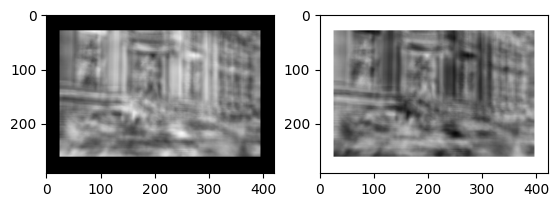

In [16]:
img1 = io.imread('statue1.PNG')
img2 = io.imread('statue2.PNG')

plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)

patch = img1[70:100, 65:90]
plt.subplot(133); plt.imshow(patch)

size = patch.shape 

res = np.full(img1.shape[0:2], 0)
img1 = img1.mean(axis=2)
patch = patch.mean(axis=2)
for i in range(size[0], img1.shape[0] - size[0]):
    for j in range(size[1], img1.shape[1] - size[1]):
       res[i,j] = np.sum((img1[i- size[0] // 2: i +size[0]//2, j - size[1]//2: j + size[1]//2 + 1] - patch)**2)

plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(res, cmap="grey")
plt.subplot(132); plt.imshow(-res, cmap="grey")

res = np.full(img2.shape[0:2], 0)
img2 = img2.mean(axis=2)
for i in range(size[0], img2.shape[0] - size[0]):
    for j in range(size[1], img2.shape[1] - size[1]):
       res[i,j] = np.sum((img2[i- size[0] // 2: i +size[0]//2, j - size[1]//2: j + size[1]//2 + 1] - patch)**2)


plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(res, cmap="grey")
plt.subplot(132); plt.imshow(-res, cmap="grey")


## Exercice 2 - Sift example
Exemple Sift avec opencv
https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

J'aurais bien voulu le faire, mais il faut payer pour pouvoir utiliser l'algo Sift
```
Both SIFT and SURF authors require license fees for usage of their original algorithms
```

## Exercice 3 - Descripteur de Fourier
Aller chercher le contour de l'objet dans `img` en utilisant les descripteurs de Fourier

/tmp/ipykernel_62778/1282403852.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread('leaf.png').mean(axis=2)


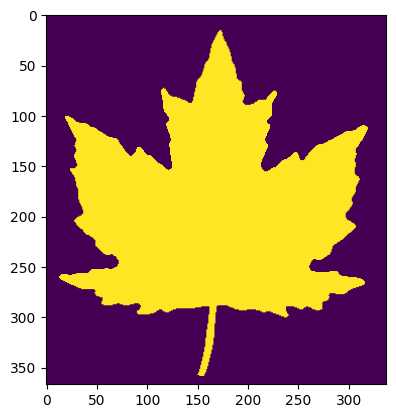

In [18]:
img = io.imread('leaf.png').mean(axis=2)
img[img <= img.min()] = 0
img[img > 0] = 1
img.astype(np.int8)

plt.imshow(img); plt.show()

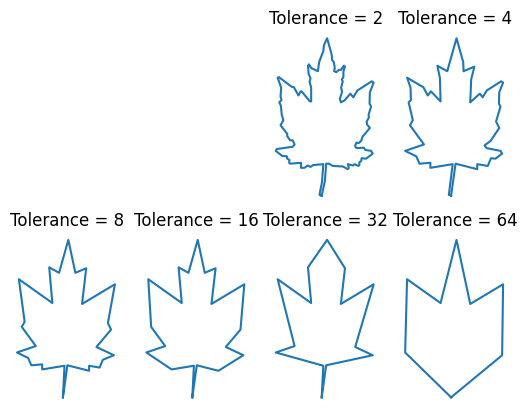

In [24]:
# Extraction de la frontière
contours = measure.find_contours(img, level=False)[0]

for i, t in enumerate([2,4,8,16,32,64]):
    cmpp = measure.approximate_polygon(contours, tolerance=t)
    plt.subplot(2,4,i+3)
    plt.plot(cmpp[:,1], cmpp[:,0])
    plt.xlim((0,img.shape[1]))
    plt.ylim((img.shape[0],0))
    plt.axis("off")
    plt.title(f"Tolerance = {t}")


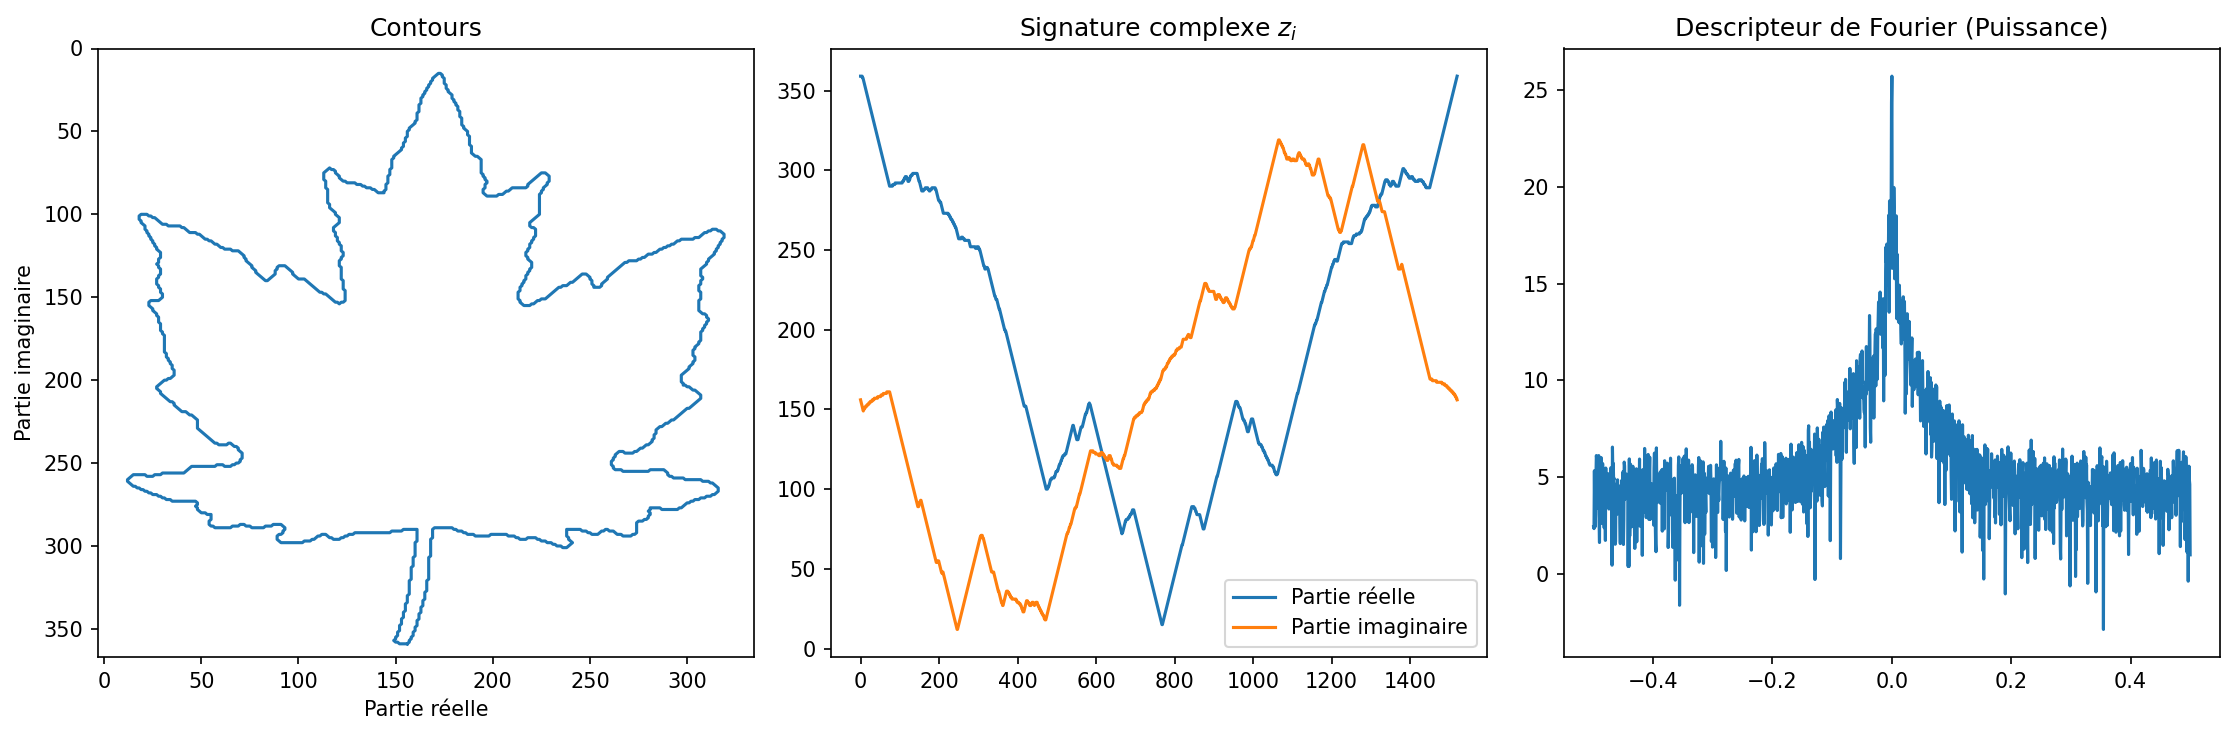

In [162]:
# Descripteur de Fourier
p

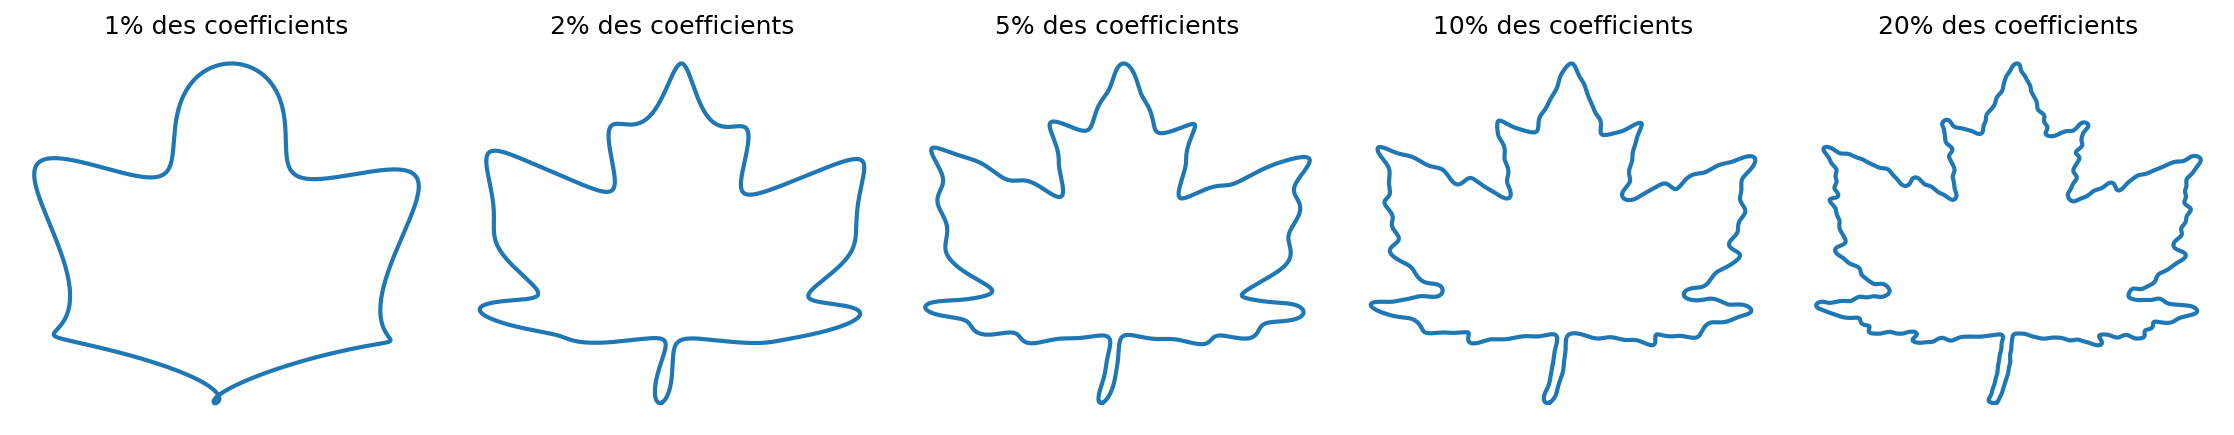

In [153]:
# Approximations
seuils = [0.005,0.01,0.025,0.05,0.1]
...